# Red Wine Quality Prediction

## Import Required Libraries

In [1]:
import pandas as pd # for Data Frame
import numpy as np # for Mathemetical Operation
import matplotlib.pyplot as plt # for Visulization
%matplotlib inline
import seaborn as sns # for Visulization
import warnings # for Ignoring Warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC # for SVM - Support Vector Machine
from sklearn.model_selection import train_test_split # for Split data into Train and Test
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score # for Accuracy
from sklearn.metrics import classification_report # for Accuracy

## Part - 1: Data Exploration and Pre-processing

### 1) Load the give dataset

In [2]:
df = pd.read_csv('Project_6_Red_Wine_Quality_Analysis.csv')

In [3]:
df.head()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8


### 2) Print the information from dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quality_Category    4894 non-null   int64  
 1   volatileacidity     4894 non-null   float64
 2   citricacid          4894 non-null   float64
 3   residualsugar       4894 non-null   float64
 4   chlorides           4894 non-null   float64
 5   freesulfurdioxide   4894 non-null   int64  
 6   totalsulfurdioxide  4894 non-null   int64  
 7   density             4894 non-null   float64
 8   sulphates           4894 non-null   float64
 9   alcohol             4894 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 382.5 KB


### 3) Describe the Dataset

In [5]:
df.describe()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,0.216387,0.278335,0.334146,6.391582,0.045773,35.311606,138.368615,0.994048,0.489904,10.514610
std,0.411823,0.100801,0.121047,5.071695,0.021855,17.019553,42.498278,0.003007,0.114153,1.230665
min,0.000000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987000,0.220000,8.000000
25%,0.000000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.992000,0.410000,9.500000
50%,0.000000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.994000,0.470000,10.400000
75%,0.000000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996000,0.550000,11.400000
max,1.000000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.039000,1.080000,14.200000


### 4) Print the column names from dataset

In [6]:
df.columns

Index(['Quality_Category', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

### 5) Display the barchart of Quality_Category value counts

<AxesSubplot:xlabel='Quality_Category', ylabel='count'>

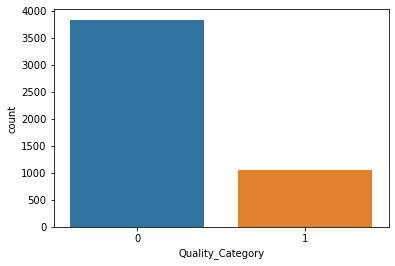

In [10]:
sns.countplot('Quality_Category', data=df)

### 6) Display Scatter plot between volatileacidity & citricacid

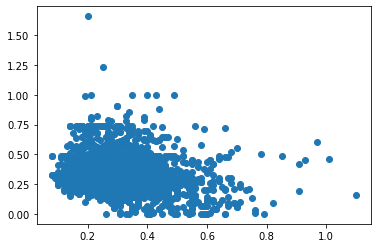

In [11]:
plt.scatter(df.volatileacidity, df.citricacid)

### 7) Display Scatter plot between residualsugar & chlorides

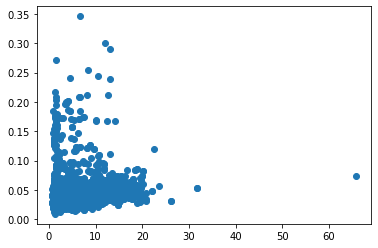

In [12]:
plt.scatter(df.residualsugar, df.chlorides)

### 8) Display scatter plot between sulphates & alcohol

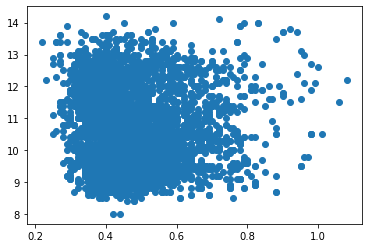

In [13]:
plt.scatter(df.sulphates, df.alcohol)

### 9) Display histplot of dataset

array([[<AxesSubplot:title={'center':'Quality_Category'}>,
        <AxesSubplot:title={'center':'volatileacidity'}>,
        <AxesSubplot:title={'center':'citricacid'}>],
       [<AxesSubplot:title={'center':'residualsugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'freesulfurdioxide'}>],
       [<AxesSubplot:title={'center':'totalsulfurdioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

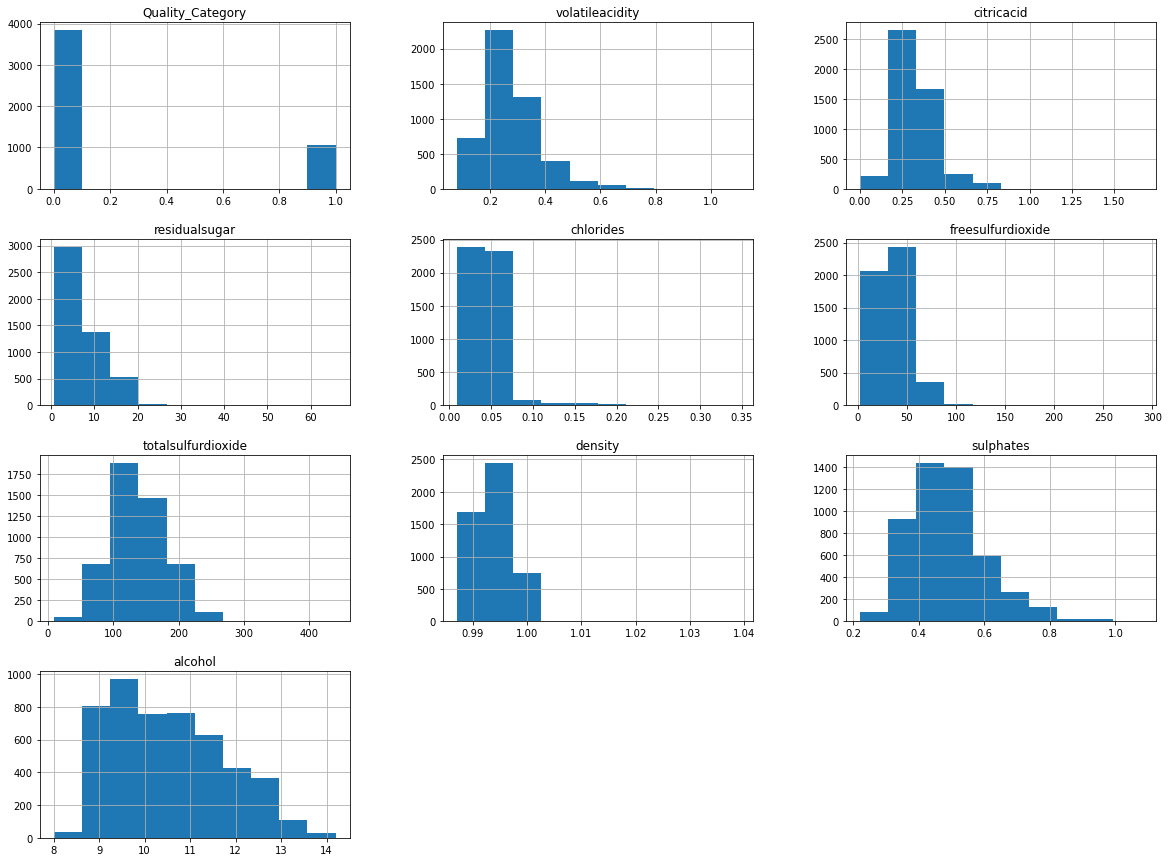

In [16]:
df.hist(figsize=(20,15))

### 9) Find the null values

In [17]:
df.isnull().sum()

Quality_Category      0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
sulphates             0
alcohol               0
dtype: int64

### 10) Create feature data and target data

In [18]:
x = df.drop(['Quality_Category'], axis=1)

In [19]:
x.head()

,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8


In [20]:
y = df[['Quality_Category']]

In [21]:
y.head()

,Quality_Category
0,0
1,0
2,0
3,0
4,0


## Part - 2: Working with Models

### 1) Split into trining and testing

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=50)

In [99]:
x_train.head()

,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
2085,0.17,0.32,1.6,0.053,47,150,0.995,0.76,9.6
3803,0.21,0.62,6.4,0.041,7,113,0.994,0.59,10.2
2375,0.27,0.19,2.0,0.084,21,191,0.995,0.63,9.6
2748,0.43,0.30,6.6,0.025,15,138,0.991,0.46,12.6
47,0.25,0.29,1.1,0.068,39,124,0.991,0.58,11.0


In [100]:
x_train.shape

(3915, 9)

In [101]:
x_test.shape

(979, 9)

In [102]:
y_train.shape

(3915, 1)

In [103]:
y_test.shape

(979, 1)

### 2) Apply Support Vector Machine

In [116]:
svm = SVC()

In [105]:
svm.fit(x_train, y_train)

SVC()

In [106]:
y_pred = svm.predict(x_test)

### 3) Show Training Score

In [107]:
training_score = round(svm.score(x_train, y_train)*100, 2)
training_score

78.37

In [108]:
print('Training Score: ', training_score)

Training Score:  78.37


### 4) Show the Testing Score

In [110]:
testing_score = round(svm.score(x_test, y_test)*100, 2)
testing_score

78.35

In [112]:
print('Testing Score: ', testing_score)

Testing Score:  78.35


### 5) Show the accuracy

In [113]:
accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
accuracy

78.35

In [114]:
print('Accuracy Score: ', accuracy)

Accuracy Score:  78.35


### 6) Create a new model and try it with parameter C=100

In [117]:
svm2 = SVC(C=100)

In [118]:
svm2.fit(x_train, y_train)

SVC(C=100)

In [119]:
y_pred_2 = svm2.predict(x_test)

### 7) Repeat step 3,4 and 5

### Show Training Score

In [120]:
training_score_2 = round(svm2.score(x_train, y_train)*100, 2)
training_score_2

78.37

In [121]:
print('Trianing Score: ', training_score_2)

Trianing Score:  78.37


### Show the Testing Score

In [122]:
testing_score_2 = round(svm2.score(x_test, y_test)*100, 2)
testing_score_2

78.35

In [123]:
print('Testing Score: ', testing_score_2)

Testing Score:  78.35


### Show the accuracy

In [124]:
accuracy_2 = round(accuracy_score(y_test, y_pred_2)*100, 2)
accuracy_2

78.35

In [125]:
print('Accuracy Score: ', accuracy_2)

Accuracy Score:  78.35
